In [53]:
import os
import numpy as np
import pandas as pd
import sys
import seaborn as sns
from matplotlib import pyplot as plt
from collections import Counter

# import the raw training data
from data_munge import a_i_train, a_h_train, b_i_train, b_h_train, c_i_train, c_h_train

# import the raw test data
from data_munge import a_i_test, a_h_test, b_i_test, b_h_test, c_i_test, c_h_test

# import the preprocessed data
from data_munge import aX_h_train, ay_h_train, bX_h_train, by_h_train, cX_h_train, cy_h_train
from data_munge import aX_i_train, ay_i_train, bX_i_train, by_i_train, cX_i_train, cy_i_train
from data_munge import standardize

Note that every household has individuals in it. However there is a 1:n relationship of households:individuals

In [54]:
False in list(a_i_train.index.get_level_values('id').sort_values().unique() == a_h_train.index.sort_values())

False

In [55]:
False in list(b_i_train.index.get_level_values('id').sort_values().unique() == b_h_train.index.sort_values())

False

In [56]:
False in list(c_i_train.index.get_level_values('id').sort_values().unique() == c_h_train.index.sort_values())

False

Here I'm creating some dataframes useful for later purposes. These grab all the numeric columns from household dataframes from countries A through C and standardize them.

In [57]:
AH_num = a_h_train.select_dtypes(include=[np.number])
AH_num = (AH_num - AH_num.mean()) / AH_num.std()
AH_num.fillna(0, inplace=True)
BH_num = b_h_train.select_dtypes(include=[np.number])
BH_num = (BH_num - BH_num.mean()) / BH_num.std()
BH_num.fillna(0, inplace=True)
CH_num = c_h_train.select_dtypes(include=[np.number])
CH_num = (CH_num - CH_num.mean()) / CH_num.std()
CH_num.fillna(0, inplace=True)

## Variable Distributions

### Country A

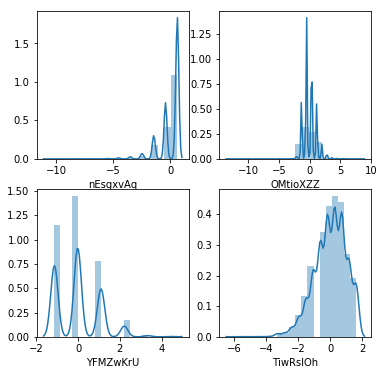

In [58]:
%matplotlib inline
fig, axs = plt.subplots(figsize=(6,6), ncols=2, nrows=2)
temp_count = 0
for row in (0,1):
    for col in (0,1):
        sns.distplot(AH_num.iloc[:,temp_count], bins = 20, ax=axs[row, col])
        temp_count += 1    

### Country B

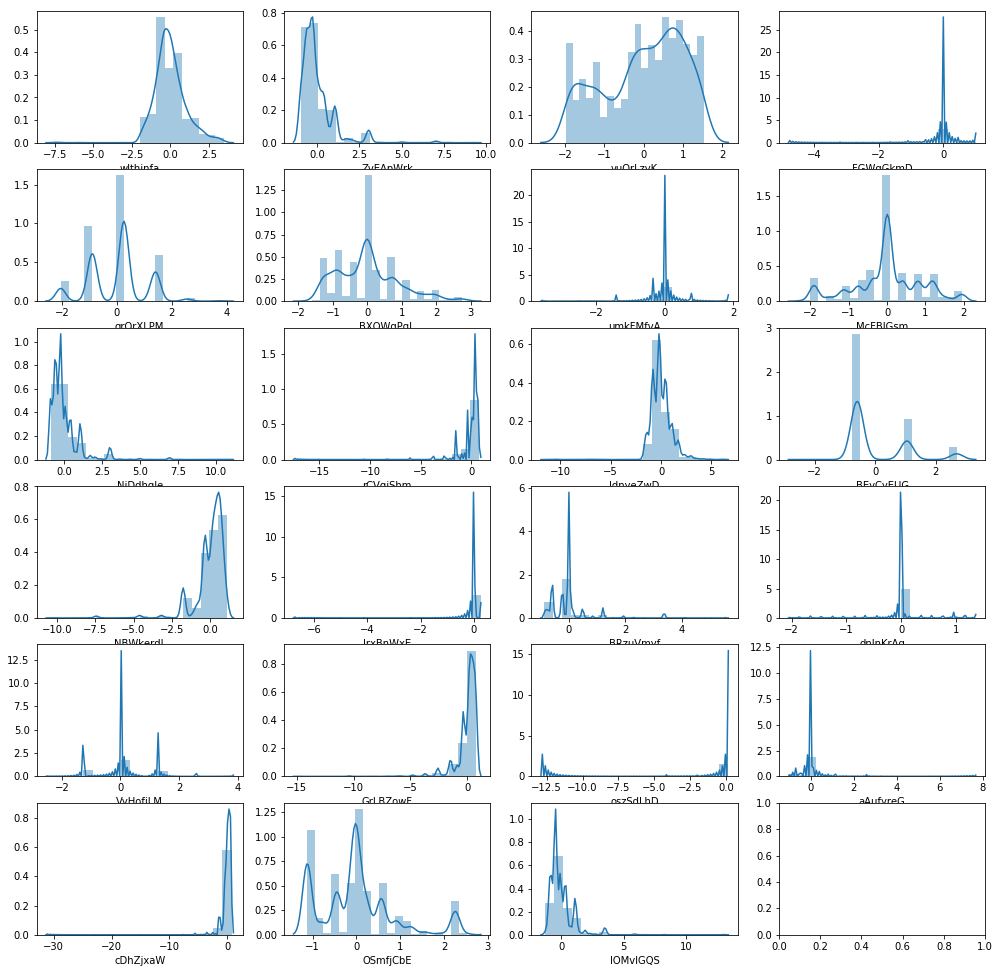

In [23]:
fig, axs = plt.subplots(figsize=(17,17), ncols=4, nrows=6)
temp_count = 0
for row in range(6):
    for col in range(4):
        if temp_count > 22:
            break
        sns.distplot(BH_num.iloc[:,temp_count], bins = 20, ax=axs[row, col])
        temp_count += 1        

Same data, but in boxplot form:

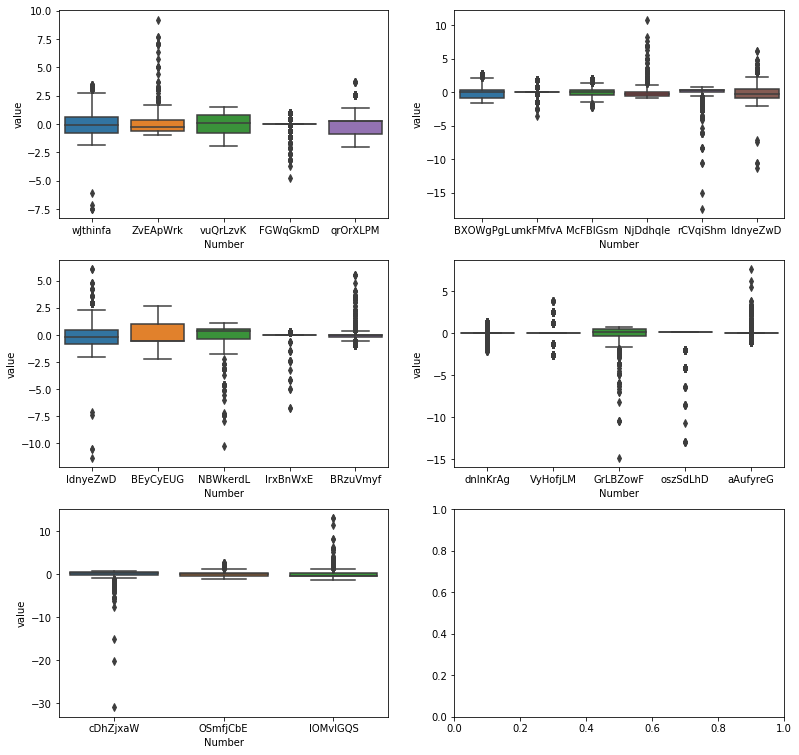

In [59]:
fig, axs = plt.subplots(figsize=(13,13), ncols=2, nrows=3)
BH_melt1 = pd.melt(BH_num.iloc[:,0:5], var_name=['Number']) 
sns.boxplot(y="value", x="Number", data=BH_melt1, ax = axs[0,0])
BH_melt2 = pd.melt(BH_num.iloc[:,5:11], var_name=['Number']) 
sns.boxplot(y="value", x="Number", data=BH_melt2,ax = axs[0,1])
BH_melt3 = pd.melt(BH_num.iloc[:,10:15], var_name=['Number']) 
sns.boxplot(y="value", x="Number", data=BH_melt3, ax = axs[1,0])
BH_melt4 = pd.melt(BH_num.iloc[:,15:20], var_name=['Number']) 
sns.boxplot(y="value", x="Number", data=BH_melt4, ax = axs[1,1])
BH_melt5 = pd.melt(BH_num.iloc[:,20:24], var_name=['Number']) 
sns.boxplot(y="value", x="Number", data=BH_melt5, ax = axs[2,0])

### Country C

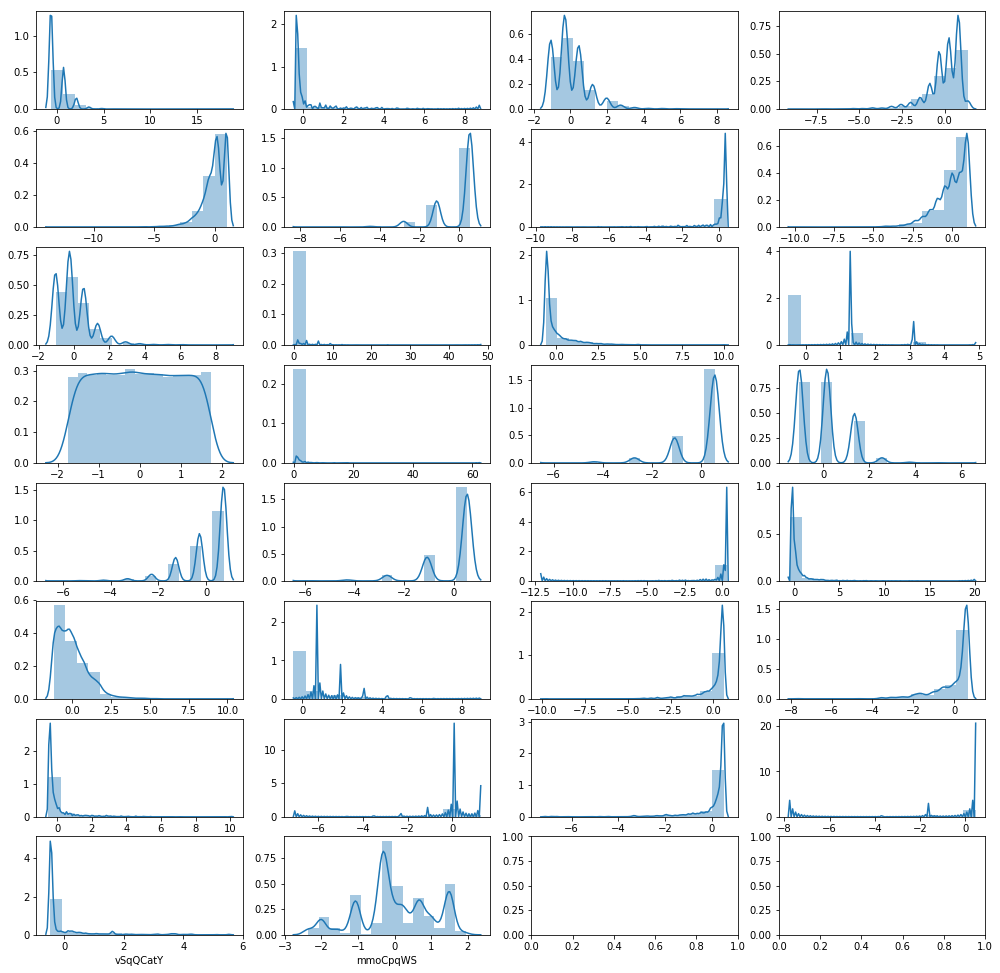

In [27]:
fig, axs = plt.subplots(figsize=(17,17), ncols=4, nrows=8)
temp_count = 0
for row in range(8):
    for col in range(4):
        if temp_count > 29:
            break
        sns.distplot(CH_num.iloc[:,temp_count], bins = 15, ax=axs[row, col])
        temp_count += 1    

Boxplots for country C:

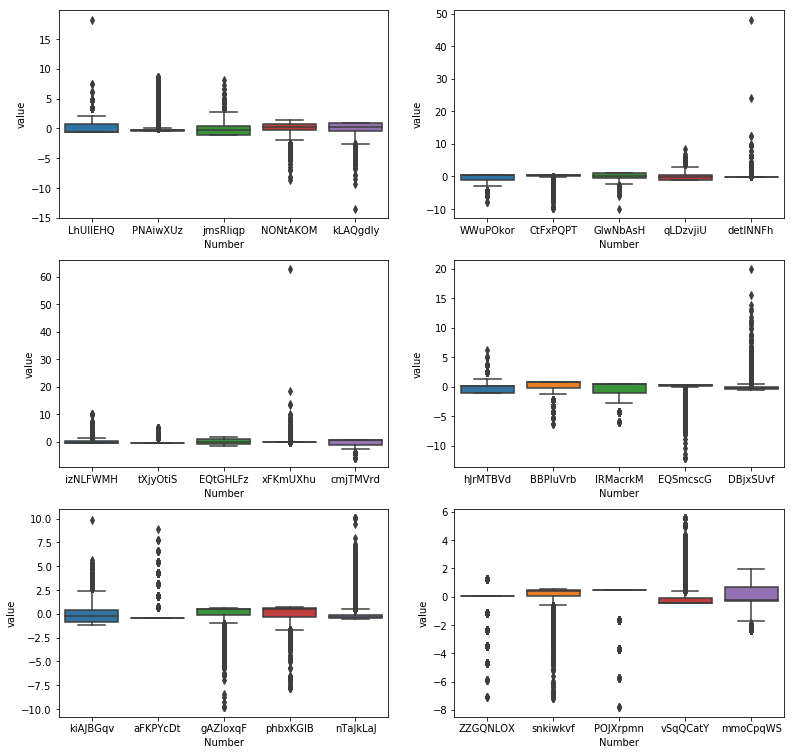

In [30]:
fig, axs = plt.subplots(figsize=(13,13), ncols=2, nrows=3)    
CH_melt1 = pd.melt(CH_num.iloc[:,0:5], var_name=['Number']) 
sns.boxplot(y="value", x="Number", data=CH_melt1, ax = axs[0,0])
CH_melt2 = pd.melt(CH_num.iloc[:,5:10], var_name=['Number']) 
sns.boxplot(y="value", x="Number", data=CH_melt2, ax = axs[0,1])
CH_melt3 = pd.melt(CH_num.iloc[:,10:15], var_name=['Number']) 
sns.boxplot(y="value", x="Number", data=CH_melt3, ax = axs[1,0])
CH_melt4 = pd.melt(CH_num.iloc[:,15:20], var_name=['Number']) 
sns.boxplot(y="value", x="Number", data=CH_melt4, ax = axs[1,1])
CH_melt5 = pd.melt(CH_num.iloc[:,20:25], var_name=['Number']) 
sns.boxplot(y="value", x="Number", data=CH_melt5, ax = axs[2,0])
CH_melt6 = pd.melt(CH_num.iloc[:,25:30], var_name=['Number']) 
sns.boxplot(y="value", x="Number", data=CH_melt6, ax = axs[2,1])

## Balance of Poor/Non-Poor by Country

Only country A is balanced with respect to poor/non-poor. For countries B and C, the poor represent only a small minority. Driven Data has a link to a resource specifically addressing this issue. We should pursue further.

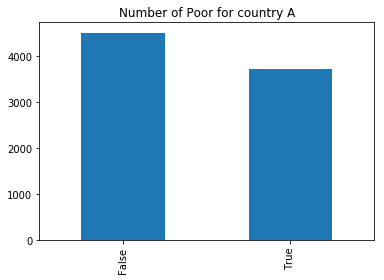

In [31]:
a_h_train.poor.value_counts().plot.bar(title='Number of Poor for country A')

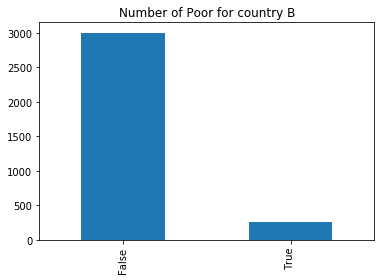

In [32]:
b_h_train.poor.value_counts().plot.bar(title='Number of Poor for country B')

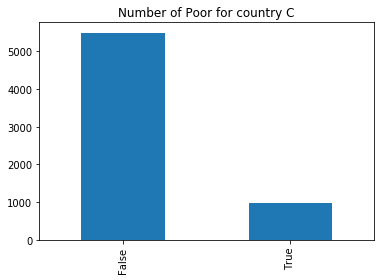

In [33]:
c_h_train.poor.value_counts().plot.bar(title='Number of Poor for country C')

## Distribution of Number of Individuals Per Household by Country

Country C has the most skewed distribution in this respect. The mean number of individuals per household is seemingly highest in country B.

In [47]:
ai_count = list(Counter(a_i_train.index.get_level_values('id')).items())
ai_count_chart = np.array([x[1] for x in ai_count])
bi_count = list(Counter(b_i_train.index.get_level_values('id')).items())
bi_count_chart = np.array([x[1] for x in bi_count])
ci_count = list(Counter(c_i_train.index.get_level_values('id')).items())
ci_count_chart = np.array([x[1] for x in ci_count])

### Country A

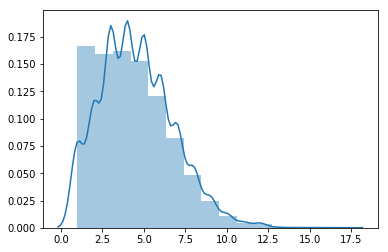

In [36]:
sns.distplot(ai_count_chart, bins=15)

### Country B

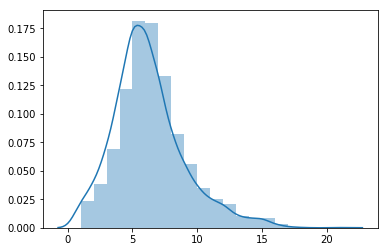

In [37]:
sns.distplot(bi_count_chart, bins=20 )

### Country C

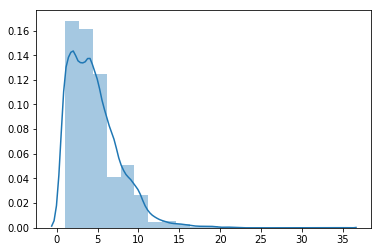

In [38]:
sns.distplot(ci_count_chart, bins=20 )

## Cardinality of Categorical Data

It's interesting to examine this data. Some variables have as high as 85 different categories.

In [39]:
def dfcard(df):
    cardinality = np.zeros(len(df.columns))
    for i in range(len(df.columns)):
        if type(df.iloc[1,i]) == str:
            cardinality[i] = float(len(list(Counter(df.iloc[:,i]))))
        else: 
            cardinality[i] = np.nan                        
    return(cardinality)

In [41]:
dfcard(a_h_train)

array([  2.,   2.,   3.,   2.,   2.,   2.,   2.,   3.,  31.,   2.,   2.,
         2.,   2.,   2.,   3.,   2.,   3.,   2.,   2.,   2.,   2.,   2.,
         3.,   9.,   2.,   2.,   3.,   3.,   2.,   2.,   2.,   2.,   2.,
         2.,  nan,   3.,   2.,   3.,   2.,   2.,   3.,   2.,   2.,   2.,
         2.,   3.,   2.,   2.,   2.,   2.,   2.,   2.,   9.,   2.,   2.,
         2.,   2.,   2.,   4.,   2.,   2.,   2.,   2.,   2.,   3.,   3.,
         2.,   2.,   2.,   2.,   2.,   3.,   2.,   2.,   2.,   8.,   3.,
         3.,   6.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,
         2.,   2.,   6.,   2.,   3.,   2.,   2.,   2.,   2.,   2.,   2.,
         2.,   5.,   2.,   2.,   2.,   2.,   3.,   2.,   2.,   2.,  nan,
         3.,   2.,   2.,   2.,   2.,   2.,   6.,   2.,   2.,   2.,   2.,
         2.,   2.,   2.,   3.,   2.,   2.,   2.,   9.,   2.,   2.,   2.,
         2.,   2.,   2.,   2.,   2.,   2.,   2.,   8.,   3.,   2.,   3.,
         7.,   2.,   2.,   3.,   2.,   3.,   2.,   

In [42]:
dfcard(b_h_train)

array([  5.,   2.,   2.,  nan,   3.,  nan,   8.,   5.,   2.,   1.,   3.,
         2.,   2.,   3.,   2.,   2.,   8.,   2.,   2.,   2.,   1.,   7.,
         5.,   3.,   5.,   2.,   3.,   3.,   2.,  nan,   2.,   2.,   2.,
         2.,   6.,   8.,   2.,   2.,   2.,   3.,   8.,   2.,   2.,   8.,
         2.,   3.,   5.,   3.,   3.,   2.,   2.,  12.,   4.,  nan,   2.,
         4.,   2.,   2.,   2.,  nan,   8.,   7.,   7.,   2.,   2.,   2.,
         2.,   2.,   3.,   2.,   2.,   2.,   8.,  nan,   4.,   3.,   9.,
         2.,   2.,  nan,   8.,   4.,   2.,   2.,   2.,   2.,   2.,   2.,
         2.,   8.,   2.,   2.,   8.,   2.,   8.,   2.,   3.,   2.,   4.,
         4.,   6.,   2.,   5.,   2.,   2.,   3.,   3.,   8.,   2.,   4.,
         2.,   2.,   4.,   3.,   3.,  12.,   3.,   2.,   2.,   3.,   2.,
         2.,   2.,   2.,   3.,   3.,   2.,   2.,   7.,   2.,   2.,   8.,
         5.,   8.,   2.,   8.,   6.,   2.,   6.,   3.,   2.,  nan,   2.,
         2.,   2.,   2.,   2.,   2.,   2.,   2.,   

In [43]:
dfcard(c_h_train)

array([ 13.,  36.,   4.,   3.,   5.,  nan,   2.,  nan,   2.,   2.,   2.,
        15.,   3.,   4.,   7.,  nan,  nan,   6.,   9.,   3.,  11.,   7.,
         2.,   6.,   2.,   4.,   2.,  42.,   2.,   4.,   4.,   2.,   2.,
         3.,  nan,  nan,   2.,   2.,   5.,  nan,   2.,   3.,  20.,   3.,
         4.,   6.,  nan,  12.,   2.,  nan,   2.,  nan,  12.,   2.,   3.,
        nan,  nan,  nan,   2.,   7.,   2.,  nan,   6.,   4.,   2.,   4.,
         5.,   6.,  nan,   6.,   2.,   6.,   3.,  10.,   3.,  nan,  nan,
         2.,  28.,   3.,   3.,  23.,   5.,   3.,   2.,   3.,   5.,   3.,
        10.,  nan,   4.,  nan,   2.,   2.,   3.,   2.,  10.,   2.,   4.,
         4.,   3.,   3.,   7.,   6.,   2.,  nan,   8.,   2.,   2.,   4.,
        nan,  nan,   3.,   6.,   3.,   3.,   3.,  nan,  nan,  nan,  nan,
         6.,   6.,  11.,  85.,   2.,   3.,   4.,  nan,   3.,   6.,   2.,
         9.,   2.,  nan,   2.,   2.,   3.,   2.,   3.,   3.,   2.,   2.,
         2.,  nan,   9.,   2.,   7.,   3.,   9.,   

## Does the household data already include a field on the number of individuals / HH?

In [49]:
ai_count = pd.DataFrame(ai_count, columns = ['id', 'count'])
ai_count = ai_count.set_index('id')
ai_count = (ai_count - ai_count.mean()) / ai_count.std()

bi_count = pd.DataFrame(bi_count, columns = ['id', 'count'])
bi_count = bi_count.set_index('id')
bi_count = (bi_count - bi_count.mean()) / bi_count.std()

ci_count = pd.DataFrame(ci_count, columns = ['id', 'count'])
ci_count = ci_count.set_index('id')
ci_count = (ci_count - ci_count.mean()) / ci_count.std()

Country A has a variable with an almost perfect correlation to the count variable named: "TiwRsIOh".

In [50]:
a_cor_df = pd.concat([AH_num, ai_count], axis=1, join_axes=[AH_num.index])
a_cor_df.corr(method = 'pearson')

,nEsgxvAq,OMtioXZZ,YFMZwKrU,TiwRslOh,count
nEsgxvAq,1.000000,-0.319532,-0.424389,0.214851,-0.211925
OMtioXZZ,-0.319532,1.000000,0.240423,-0.316405,0.315937
YFMZwKrU,-0.424389,0.240423,1.000000,-0.115928,0.115474
TiwRslOh,0.214851,-0.316405,-0.115928,1.000000,-0.996988
count,-0.211925,0.315937,0.115474,-0.996988,1.000000


Country B's count has a 0.90 correlation to the variable named "wJthina".

In [51]:
b_cor_df = pd.concat([BH_num, bi_count], axis=1, join_axes=[BH_num.index])
b_cor_df.corr(method = 'pearson')

,wJthinfa,ZvEApWrk,vuQrLzvK,FGWqGkmD,qrOrXLPM,BXOWgPgL,umkFMfvA,McFBIGsm,NjDdhqIe,rCVqiShm,...,BRzuVmyf,dnlnKrAg,VyHofjLM,GrLBZowF,oszSdLhD,aAufyreG,cDhZjxaW,OSmfjCbE,IOMvIGQS,count
wJthinfa,1.000000,0.116749,-0.030268,-0.003056,-0.002584,-0.045683,-0.022452,-0.010212,0.109544,-0.071196,...,-0.007792,0.031088,-0.047956,-0.121677,-0.002059,-0.038725,-0.004032,0.010849,0.049129,0.900438
ZvEApWrk,0.116749,1.000000,0.024136,0.017759,-0.043055,-0.116426,0.007111,-0.058977,0.840497,-0.226226,...,0.056909,-0.036176,-0.014136,-0.195597,-0.050962,0.011672,-0.195941,0.057673,0.173517,0.121025
vuQrLzvK,-0.030268,0.024136,1.000000,-0.024203,0.037606,0.006229,0.007371,-0.000784,0.017278,0.014933,...,0.028656,0.097172,0.008363,0.005558,-0.022377,0.004902,-0.005073,-0.056042,0.011560,-0.037539
FGWqGkmD,-0.003056,0.017759,-0.024203,1.000000,-0.014348,-0.004021,0.013990,0.002970,0.009640,-0.017586,...,-0.001071,-0.042128,-0.004827,-0.015400,-0.023713,-0.012871,0.010794,-0.009164,0.004672,-0.003137
qrOrXLPM,-0.002584,-0.043055,0.037606,-0.014348,1.000000,0.007197,-0.295689,0.018873,-0.046403,0.021081,...,-0.048006,0.011621,0.447538,0.015962,-0.018628,0.013486,0.014616,-0.046231,-0.001267,-0.002151
BXOWgPgL,-0.045683,-0.116426,0.006229,-0.004021,0.007197,1.000000,-0.036126,0.689809,-0.097878,-0.007366,...,-0.021363,0.035820,-0.008831,0.025860,0.031235,-0.051961,0.032550,-0.424017,0.010858,-0.035785
umkFMfvA,-0.022452,0.007111,0.007371,0.013990,-0.295689,-0.036126,1.000000,-0.028533,0.008833,-0.003965,...,0.014218,0.024948,-0.167450,-0.018718,0.004720,0.002496,-0.004483,0.004784,-0.024252,-0.011983
McFBIGsm,-0.010212,-0.058977,-0.000784,0.002970,0.018873,0.689809,-0.028533,1.000000,-0.052607,0.001549,...,-0.022401,0.020429,0.001580,-0.007501,0.028698,-0.044470,0.011743,-0.624651,0.025160,-0.002282
NjDdhqIe,0.109544,0.840497,0.017278,0.009640,-0.046403,-0.097878,0.008833,-0.052607,1.000000,-0.248750,...,0.033846,-0.036468,-0.013559,-0.207892,-0.039280,0.011578,-0.207990,0.056153,0.176487,0.109376
rCVqiShm,-0.071196,-0.226226,0.014933,-0.017586,0.021081,-0.007366,-0.003965,0.001549,-0.248750,1.000000,...,-0.036728,-0.004428,0.052422,0.327131,0.047415,0.005769,0.133802,-0.010819,-0.202194,-0.083085


Country C's count has a 0.89 correlation to the variable named "GIwNbAsH".

In [52]:
c_cor_df = pd.concat([CH_num, ci_count], axis=1, join_axes=[CH_num.index])
c_cor_df.corr(method = 'pearson')

,LhUIIEHQ,PNAiwXUz,jmsRIiqp,NONtAKOM,kLAQgdly,WWuPOkor,CtFxPQPT,GIwNbAsH,qLDzvjiU,detlNNFh,...,aFKPYcDt,gAZloxqF,phbxKGlB,nTaJkLaJ,ZZGQNLOX,snkiwkvf,POJXrpmn,vSqQCatY,mmoCpqWS,count
LhUIIEHQ,1.000000,-0.087405,0.140019,-0.236253,-0.033297,-0.169091,0.073645,-0.647176,0.123819,0.011100,...,0.284766,0.007914,-0.009095,-0.043421,-0.289238,0.047147,-0.154756,-0.062579,0.052437,0.562719
PNAiwXUz,-0.087405,1.000000,-0.081621,0.104562,-0.049771,0.077759,-0.781761,0.117452,-0.073835,0.105511,...,-0.090434,-0.692389,-0.399462,0.760789,0.016903,-0.488591,0.068704,0.279996,-0.001328,-0.124277
jmsRIiqp,0.140019,-0.081621,1.000000,-0.244220,-0.375289,-0.203372,0.067619,-0.257142,0.971494,-0.012929,...,0.118810,0.060403,0.051312,-0.093697,0.010013,0.067306,-0.086147,-0.070834,0.044222,0.573504
NONtAKOM,-0.236253,0.104562,-0.244220,1.000000,0.052371,0.304821,-0.095350,0.411016,-0.214389,-0.017016,...,-0.267530,-0.050914,-0.053927,0.090708,0.063923,-0.103347,0.278090,0.145388,-0.006570,-0.494102
kLAQgdly,-0.033297,-0.049771,-0.375289,0.052371,1.000000,0.029371,0.069491,0.045036,-0.379445,0.018866,...,0.043385,0.025904,-0.013514,-0.038985,0.030199,0.030260,0.012905,-0.023055,-0.089883,-0.221307
WWuPOkor,-0.169091,0.077759,-0.203372,0.304821,0.029371,1.000000,-0.084371,0.460269,-0.063553,-0.003550,...,-0.337556,-0.036524,-0.018916,0.068876,0.136957,-0.088747,0.857337,0.096402,-0.024047,-0.466567
CtFxPQPT,0.073645,-0.781761,0.067619,-0.095350,0.069491,-0.084371,1.000000,-0.102168,0.059085,-0.088848,...,0.083346,0.715916,0.453888,-0.796449,-0.003037,0.517214,-0.076243,-0.298398,0.011256,0.103554
GIwNbAsH,-0.647176,0.117452,-0.257142,0.411016,0.045036,0.460269,-0.102168,1.000000,-0.226607,-0.039080,...,-0.505111,0.008167,0.015573,0.064374,0.402306,-0.074397,0.468144,0.104685,-0.063450,-0.888664
qLDzvjiU,0.123819,-0.073835,0.971494,-0.214389,-0.379445,-0.063553,0.059085,-0.226607,1.000000,-0.014030,...,0.096219,0.057697,0.051095,-0.088257,0.015641,0.059118,-0.064376,-0.062205,0.035425,0.531343
detlNNFh,0.011100,0.105511,-0.012929,-0.017016,0.018866,-0.003550,-0.088848,-0.039080,-0.014030,1.000000,...,0.000827,-0.109805,-0.071369,0.109506,-0.019970,-0.064406,-0.002714,0.007888,-0.001485,0.022817
